<a href="https://colab.research.google.com/github/amiralitalebi/CW_MN3B/blob/main/ml_model_amirali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive and set working folder
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/coursework_project")
print("Current working directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/MyDrive/coursework_project


In [ ]:
# STEP 1: Import required libraries
import numpy as np
import json
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load class names for each label index
with open("datasets/processed_part1/label_map.json") as f:
    raw_map = json.load(f)

# Convert keys to integers
label_map = {int(k): v for k, v in raw_map.items()}


In [ ]:
# Load processed training, test, and validation sets
X_train = np.load("datasets/processed_part1/X_train.npy")
y_train = np.load("datasets/processed_part1/y_train.npy")

X_test  = np.load("datasets/processed_part1/X_test.npy")
y_test  = np.load("datasets/processed_part1/y_test.npy")

X_val   = np.load("datasets/processed_part1/X_val.npy")
y_val   = np.load("datasets/processed_part1/y_val.npy")

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (2308, 100, 100, 3)
Test set shape: (39767, 100, 100, 3)


In [ ]:
# Use a smaller test set to avoid memory problems in Colab
X_test = X_test[:5000]
y_test = y_test[:5000]

print("Reduced test set shape:", X_test.shape)


Reduced test set shape: (5000, 100, 100, 3)


In [ ]:
# Scale pixel values to 0–1
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Flatten images for Logistic Regression
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat  = X_test.reshape(len(X_test), -1)

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)


Flattened train shape: (2308, 30000)
Flattened test shape: (5000, 30000)


In [ ]:
# Build the Logistic Regression model
clf = LogisticRegression(
    max_iter=300,
    n_jobs=-1,
    verbose=1,
    multi_class="auto"
)


In [ ]:
# Fit the model to the training data
clf.fit(X_train_flat, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=300, multi_class='auto', n_jobs=-1, verbose=1)

In [ ]:
# Predict labels for the test set
y_pred = clf.predict(X_test_flat)


In [ ]:
# Print accuracy, precision, recall and F1 scores
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.07      1.00      0.13       231
           1       0.30      0.62      0.41       142
           2       0.34      0.57      0.43       154
           3       0.22      1.00      0.36       235
           4       0.20      0.24      0.22       154
           5       0.00      0.00      0.00       201
           6       0.00      0.00      0.00       160
           7       0.00      0.00      0.00       241
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00       157
          10       0.00      0.00      0.00       229
          11       0.00      0.00      0.00       228
          12       0.00      0.00      0.00       231
          13       0.00      0.00      0.00       164
          14       0.00      0.00      0.00       156
          15       0.00      0.00      0.00       148
          16       0.00      0.00      0.00       159
   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x800 with 0 Axes>

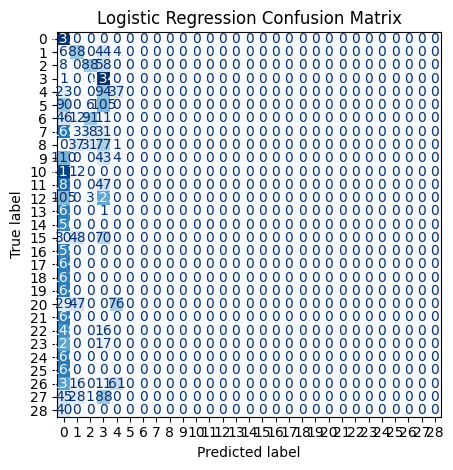

In [ ]:
# Plot confusion matrix to see prediction patterns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
# Show a few example predictions with class names
def decode_label(idx):
    return label_map[int(idx)]

for i in range(5):
    print(f"Image {i}: True = {decode_label(y_test[i])}, Predicted = {decode_label(y_pred[i])}")


Image 0: True = Apple 10, Predicted = Apple 10
Image 1: True = Apple 10, Predicted = Apple 10
Image 2: True = Apple 10, Predicted = Apple 10
Image 3: True = Apple 10, Predicted = Apple 10
Image 4: True = Apple 10, Predicted = Apple 10


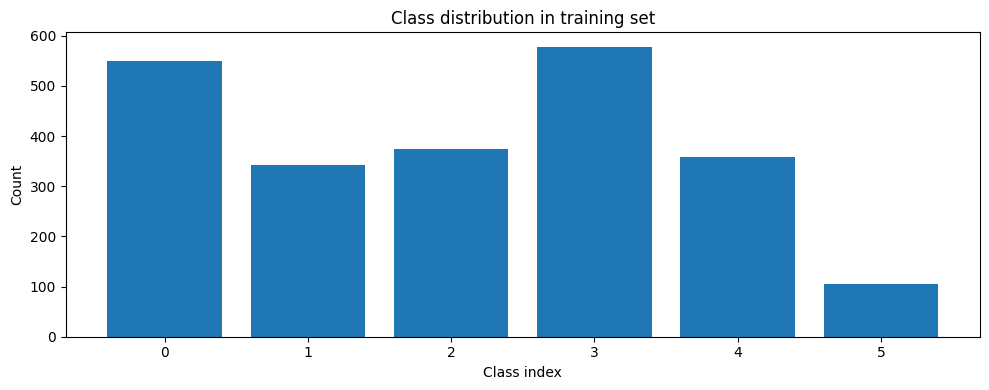

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10,4))
plt.bar(classes, counts)
plt.title("Class distribution in training set")
plt.xlabel("Class index")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


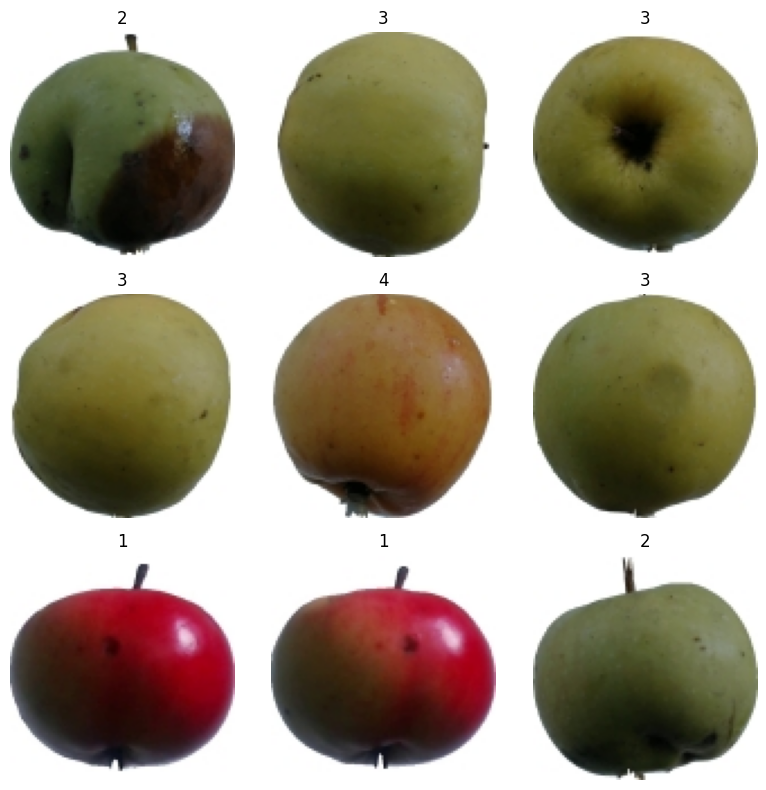

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# pick 9 random training images
idxs = np.random.choice(len(X_train), 9, replace=False)

plt.figure(figsize=(8,8))
for i, idx in enumerate(idxs):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.title(int(y_train[idx]))
    plt.axis("off")
plt.tight_layout()
plt.show()
